# Task-2 Exploratory Data Analysis

 • The background information for this task-
         The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data ad the AD wants you to perform some exploratory data analysis.
         
The data that was sent over includes:

        - Historical customer data: Customer data such as usage, sign up data, forecasted usage etc
        - Historical priciing data: variable and fixed pricing data etc
        - Churn indicator: whether eah customer has churned or not

## 1. Importing Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Supressing Unnecessary Warnings
import warnings
warnings.filterwarnings('ignore')

# Applying 'ggplot' theme in all visual
plt.style.use('ggplot')

## 2. Importing Dataset

**we are importing `client_data.csv` and `price_data.csv` individually after that we can use them in python.**

In [2]:
# Importing client_data 
client_data = pd.read_csv('client_data.csv')
client_data.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


**♦ As we can see there are some numerical and categorical data, which we need to transform before modelling**

In [3]:
# Importing price_data
price_data = pd.read_csv('price_data.csv')
price_data.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


**♦ As we can see there are lot of zeros and it is all numerical data.**

## 3. Statistics of Dataset

### Size of dataset

In [4]:
print('Rows and columns in client_data dataset are :', client_data.shape) 
print('Rows and columns in price_data dataset are :', price_data.shape) 

Rows and columns in client_data dataset are : (14606, 26)
Rows and columns in price_data dataset are : (193002, 8)


### Basic Information of both Dataset

In [5]:
# Basic information of client_data dataset
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
# Basic information of price_data dataset
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


As we can see that `datetime` related columns are not in correct format. we need to change this later

### Missing Values 

In [7]:
# Checking missing values in client_data
client_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [8]:
# Checking missing values in price_data
price_data.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

**As we can see that there is no null values available in both datasets.**

### Statistics 

In [9]:
# Statistical summary of client_data
client_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [10]:
# Statistical summary of price_data
price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


## 4. Data Visualization

Now let's see dataframes with the help of visualization

In [11]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

### 4.1 Churn

In [12]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100


 ******* Value Counts ******* 

0    13187
1     1419
Name: churn, dtype: int64


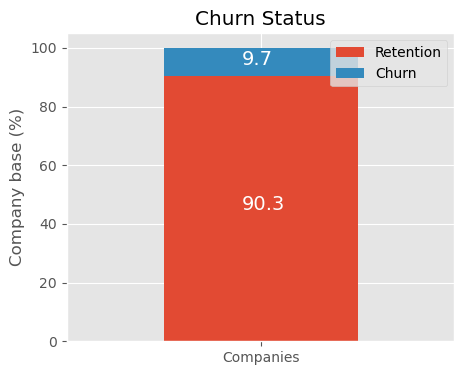

In [13]:
# Churn Status

print("\n ******* Value Counts ******* \n")
print(client_data['churn'].value_counts())

plot_stacked_bars(churn_percentage.T, 'Churn Status', (5,4), legend_=1)

**From above visual we can clearly see that almost 10% (9.7%) have churned and 90.3% have not churned.** 

### 4.2 Sales Channel

In [14]:
channel = client_data[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel.channel_sales, channel.churn])['id'].count().unstack().fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending = True)

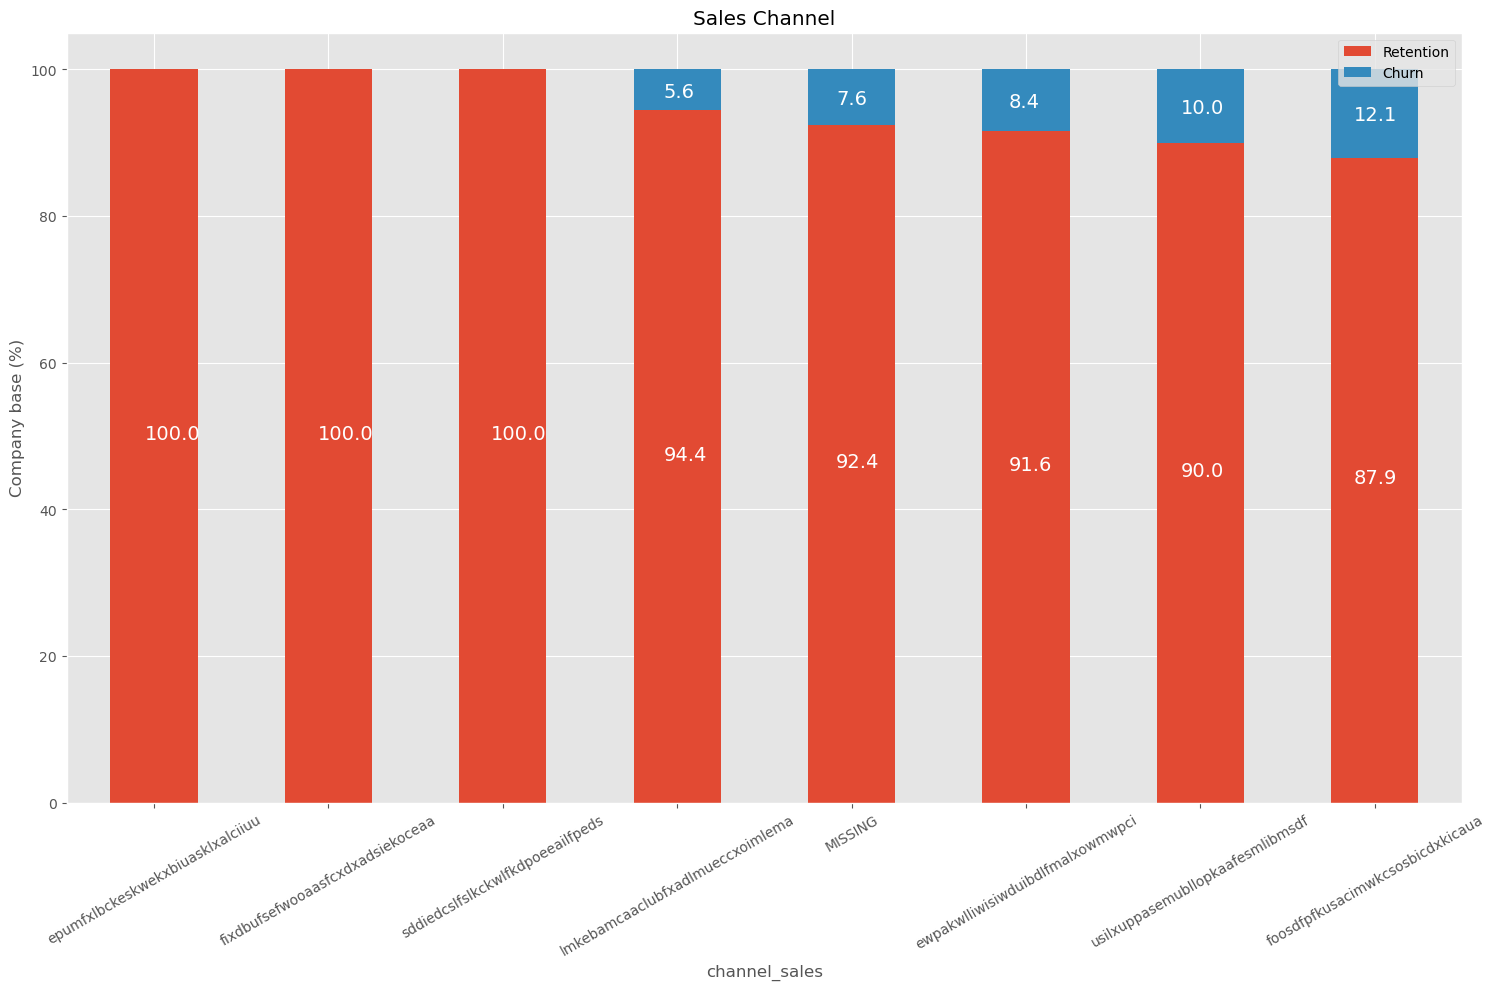

In [15]:
# Sales Channel Visual
plot_stacked_bars(channel_churn, 'Sales Channel',rot_=30)

**=> Churning customer are distributed in 5 different values for `Channel_Sales`.**

**=> `MISSING`has a churn rate of 7.6%.** 

**=> `MISSING` is the missing values available in the data.**

### 4.3 Consumption

In [16]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

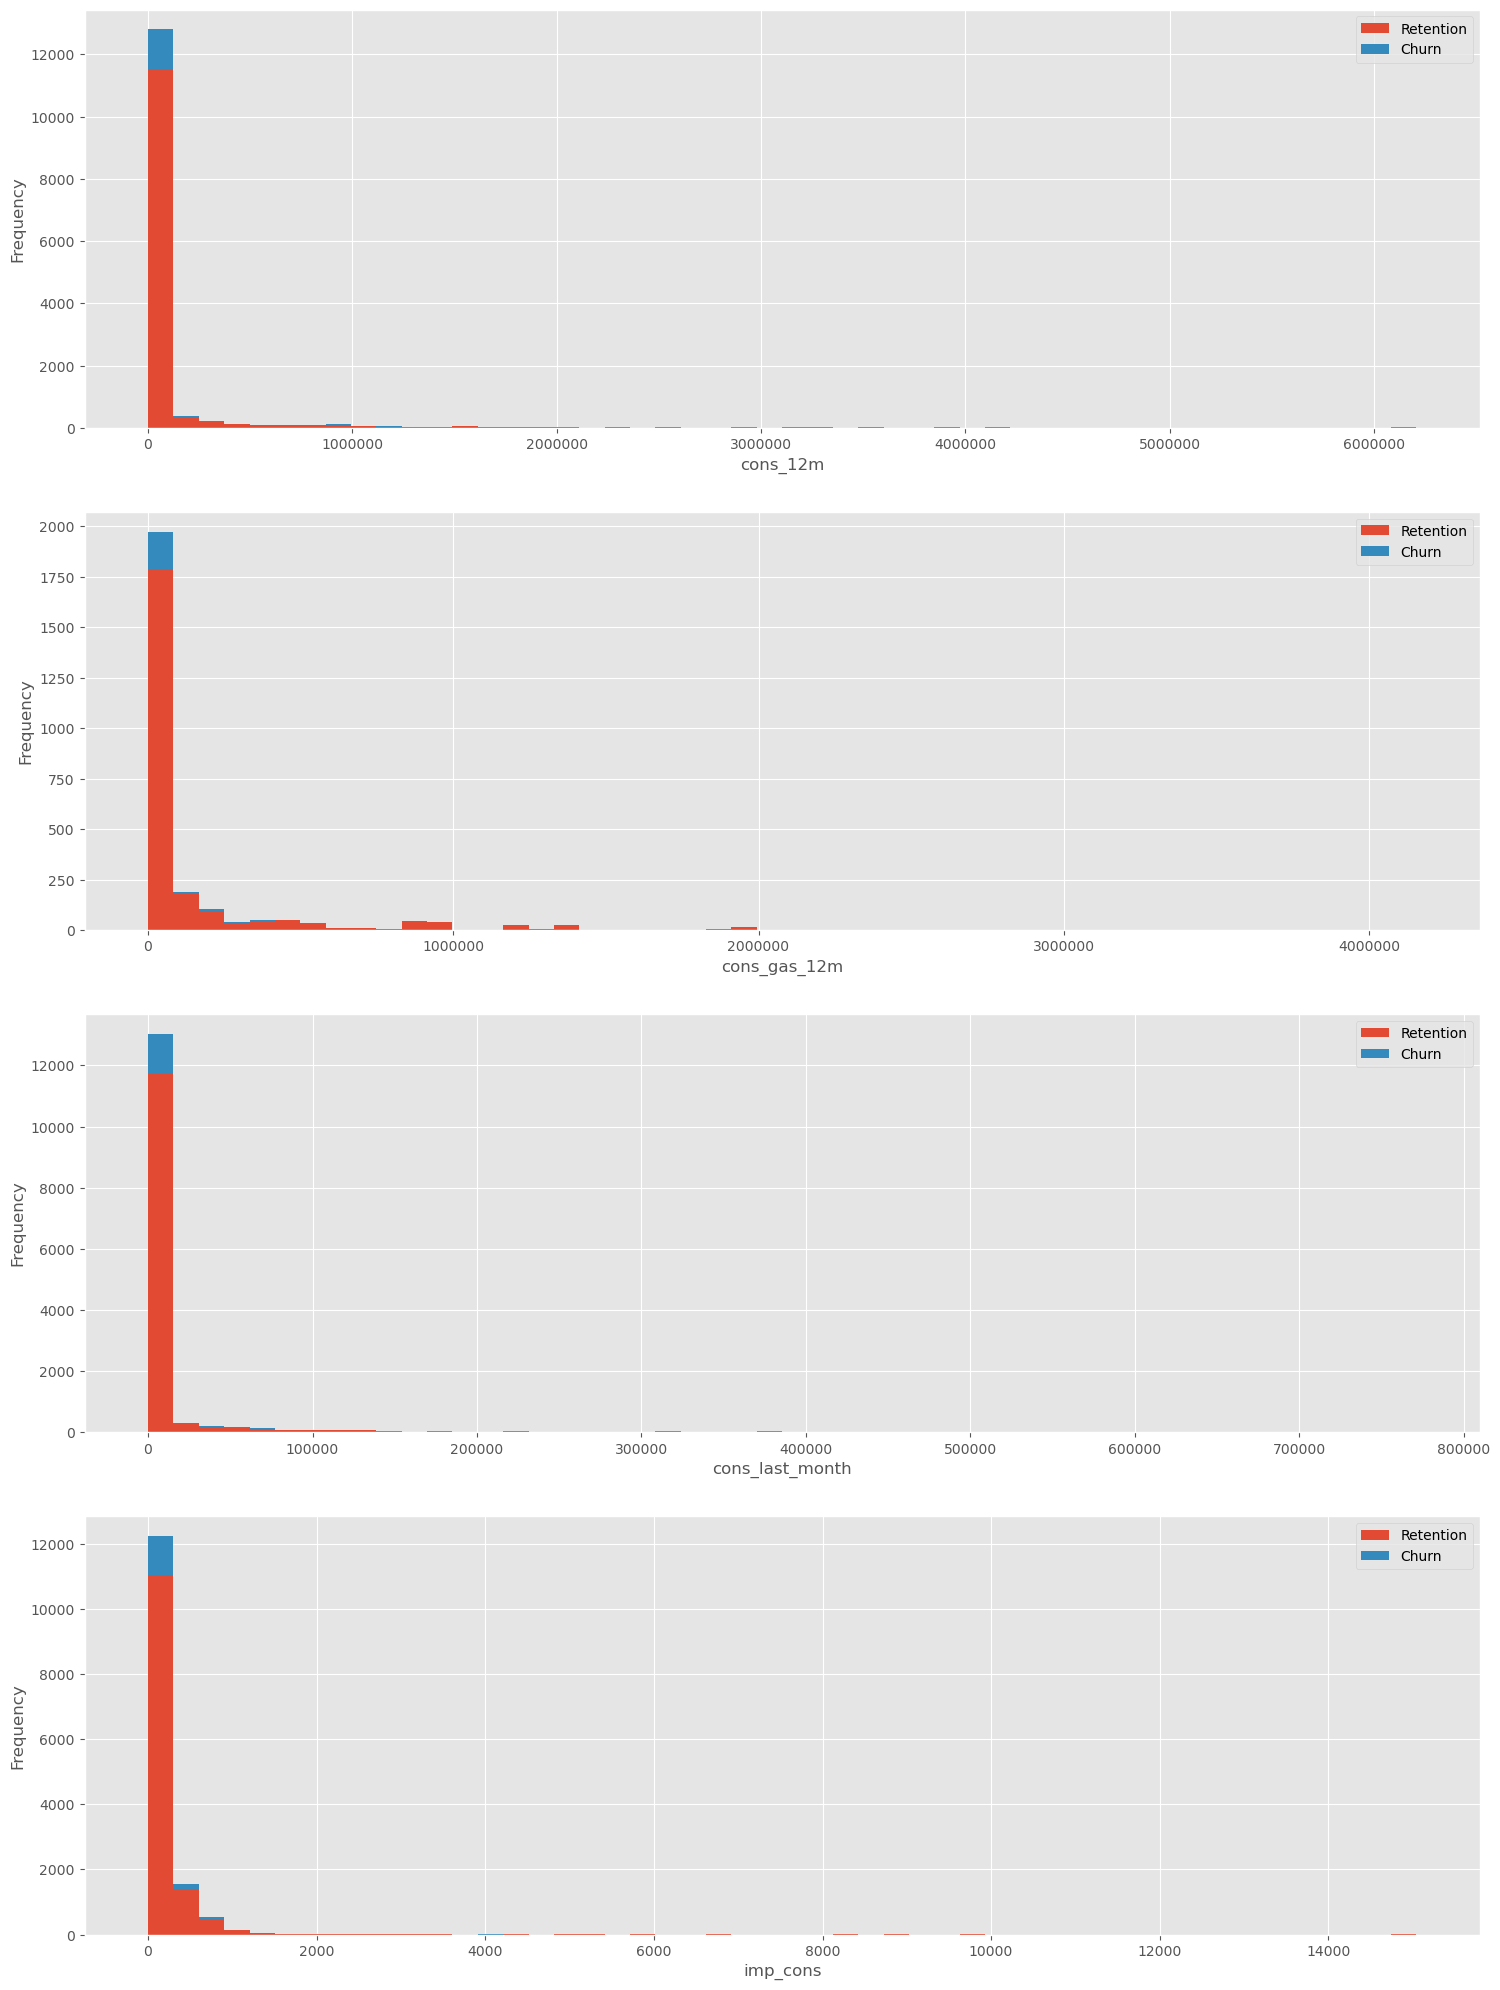

In [17]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas']== 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month' ,axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

**=> The consumption data is clearly positively skewed and has a very long right tail toward the upper values of the distribution** 

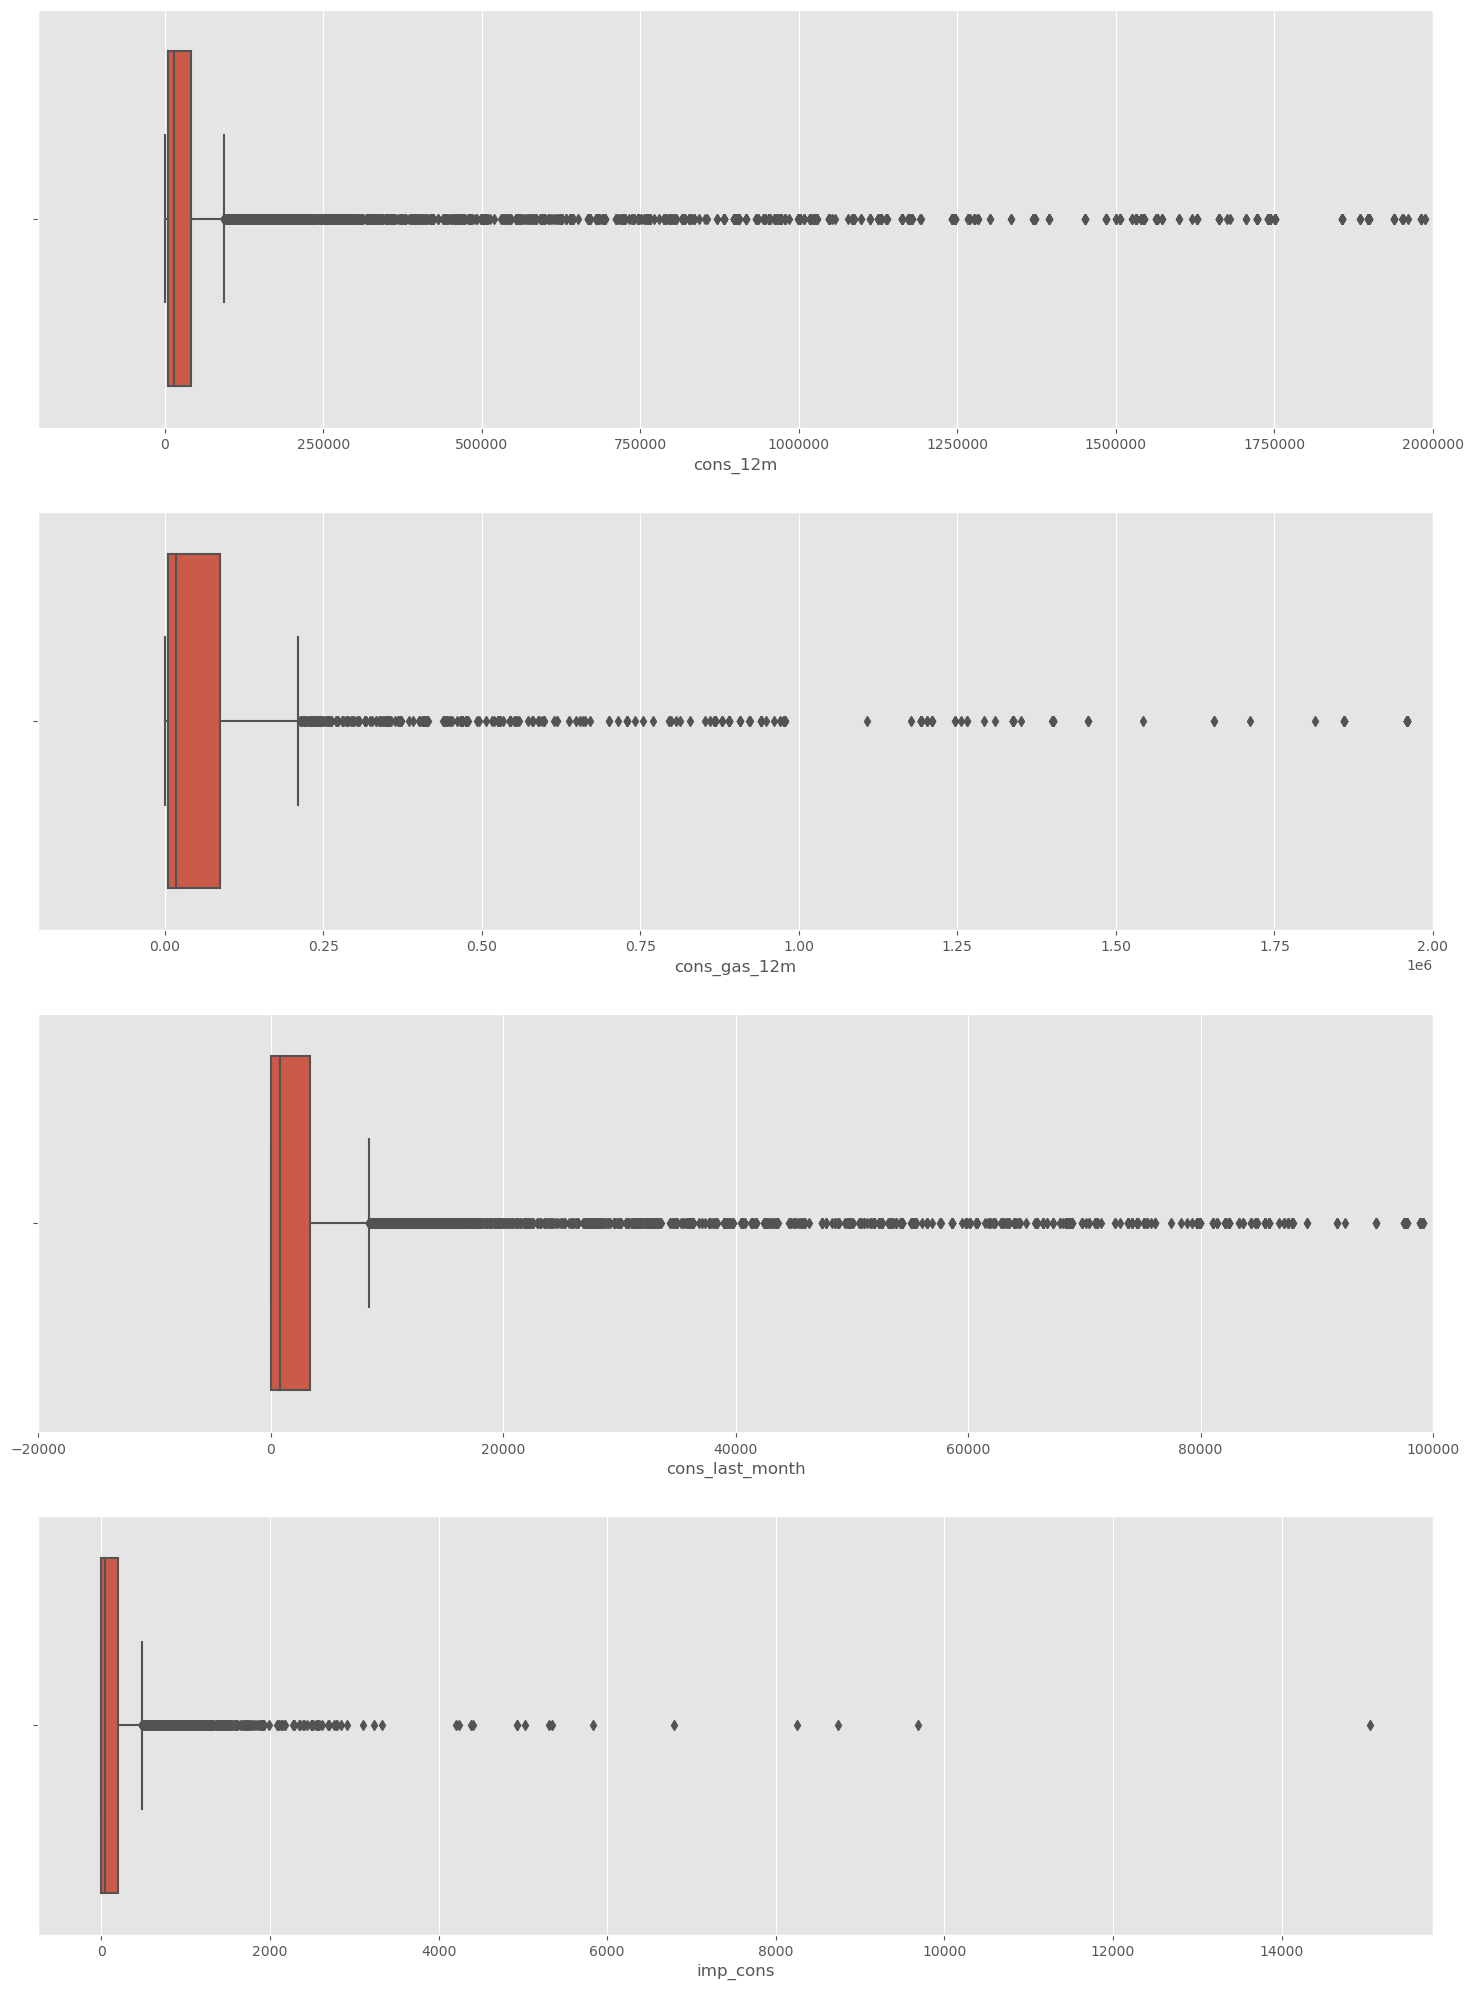

In [18]:
# Consumption on BoxPlot
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plotting Boxplot
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

# Remvoing unwanted notation & Setting limit 
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

plt.show()


### 4.4 Forecast 

In [19]:
forecast = client_data[["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]

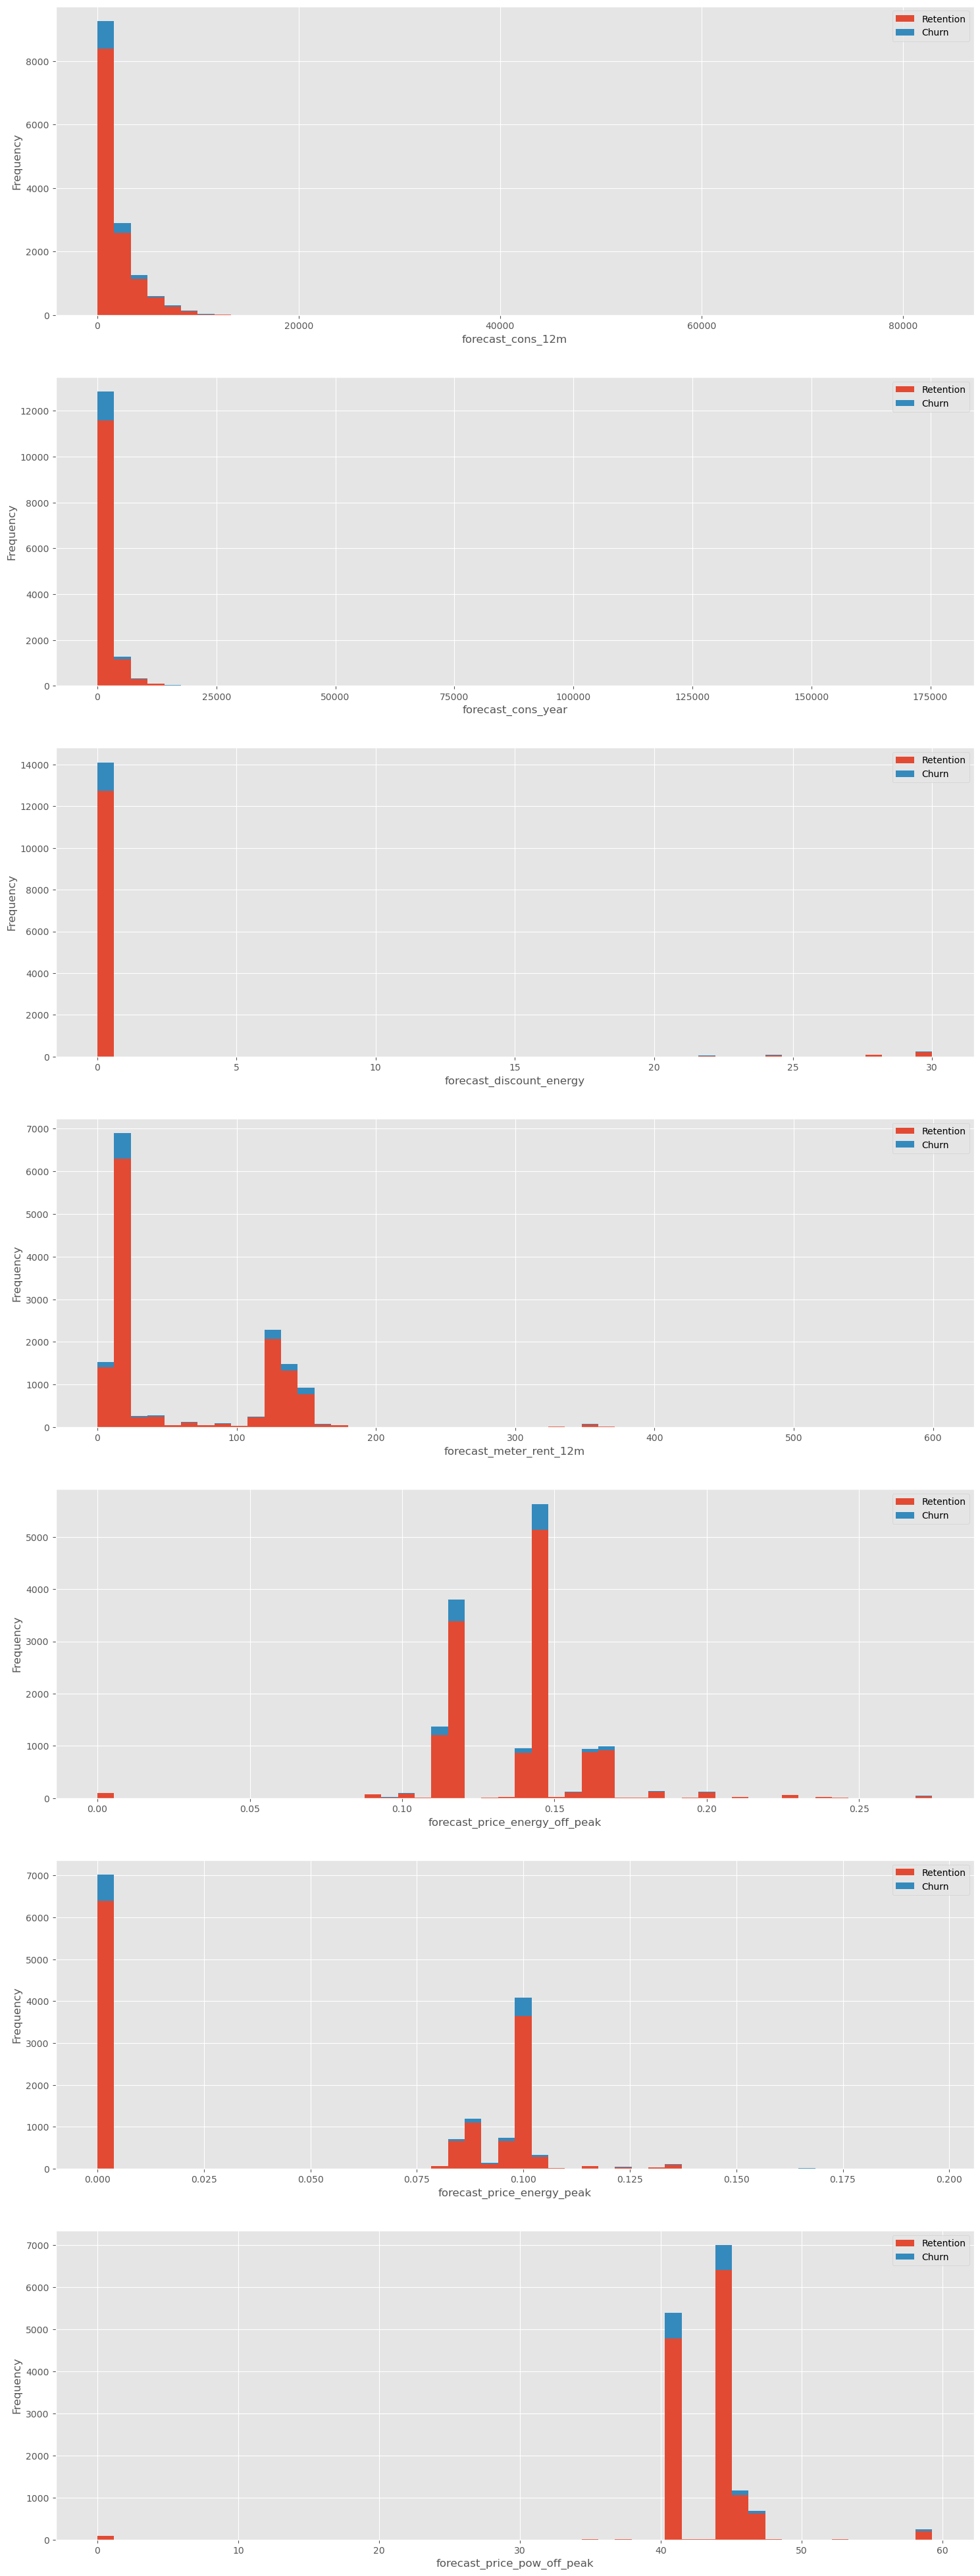

In [20]:
# Plot for Forecast

fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

plt.show()

**=> As we can see that several of the variables are significantly positively skewed, giving high tail for higher values, similarly consumption plot.**

### 4.5 Contract

In [21]:
contract_type = client_data[['id','has_gas','churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

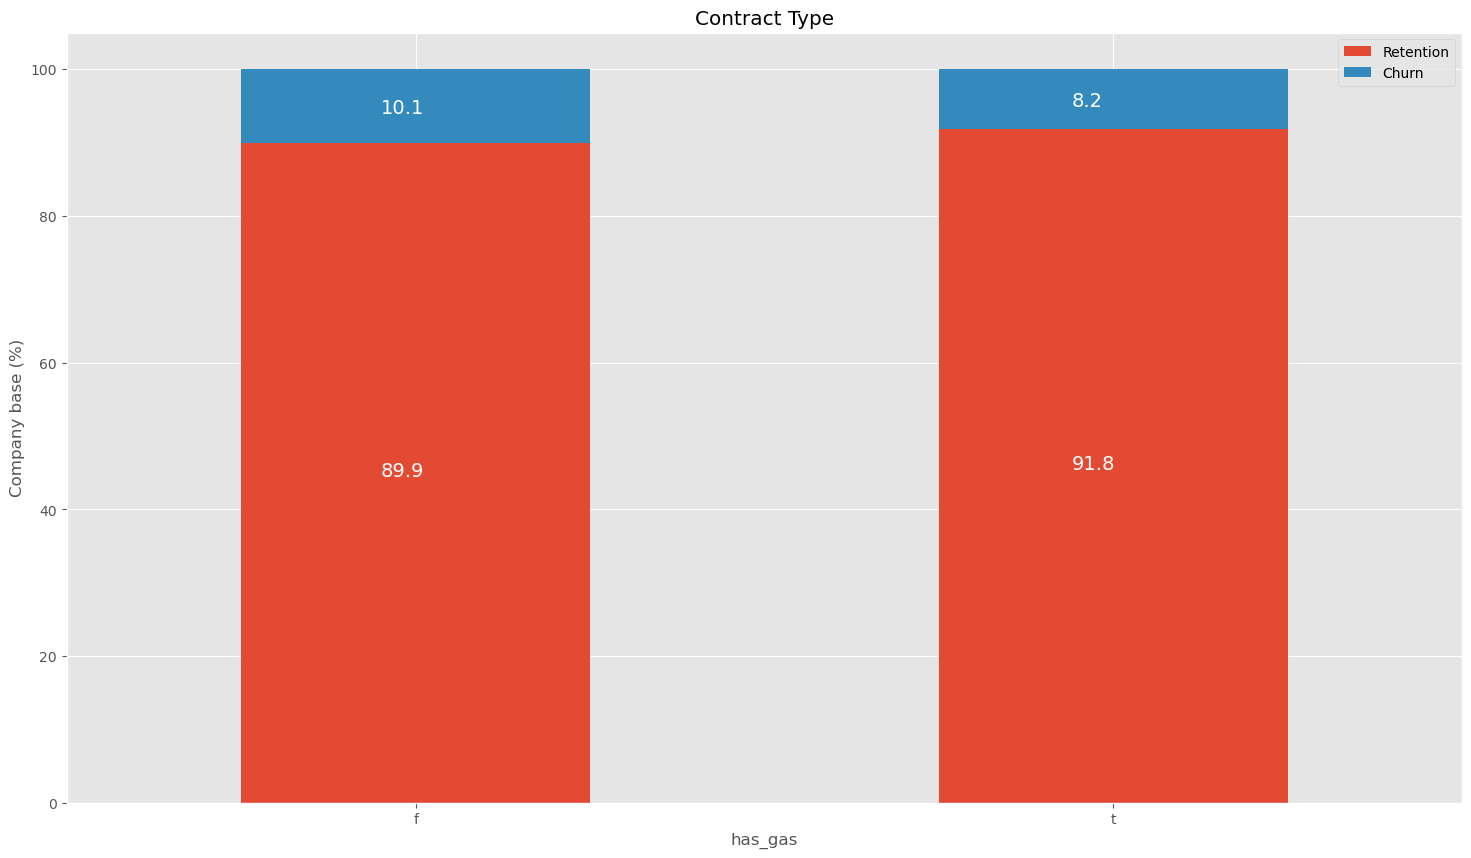

In [22]:
plot_stacked_bars(contract_percentage, 'Contract Type')

### 4.6 Margins 

In [23]:
margin = client_data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

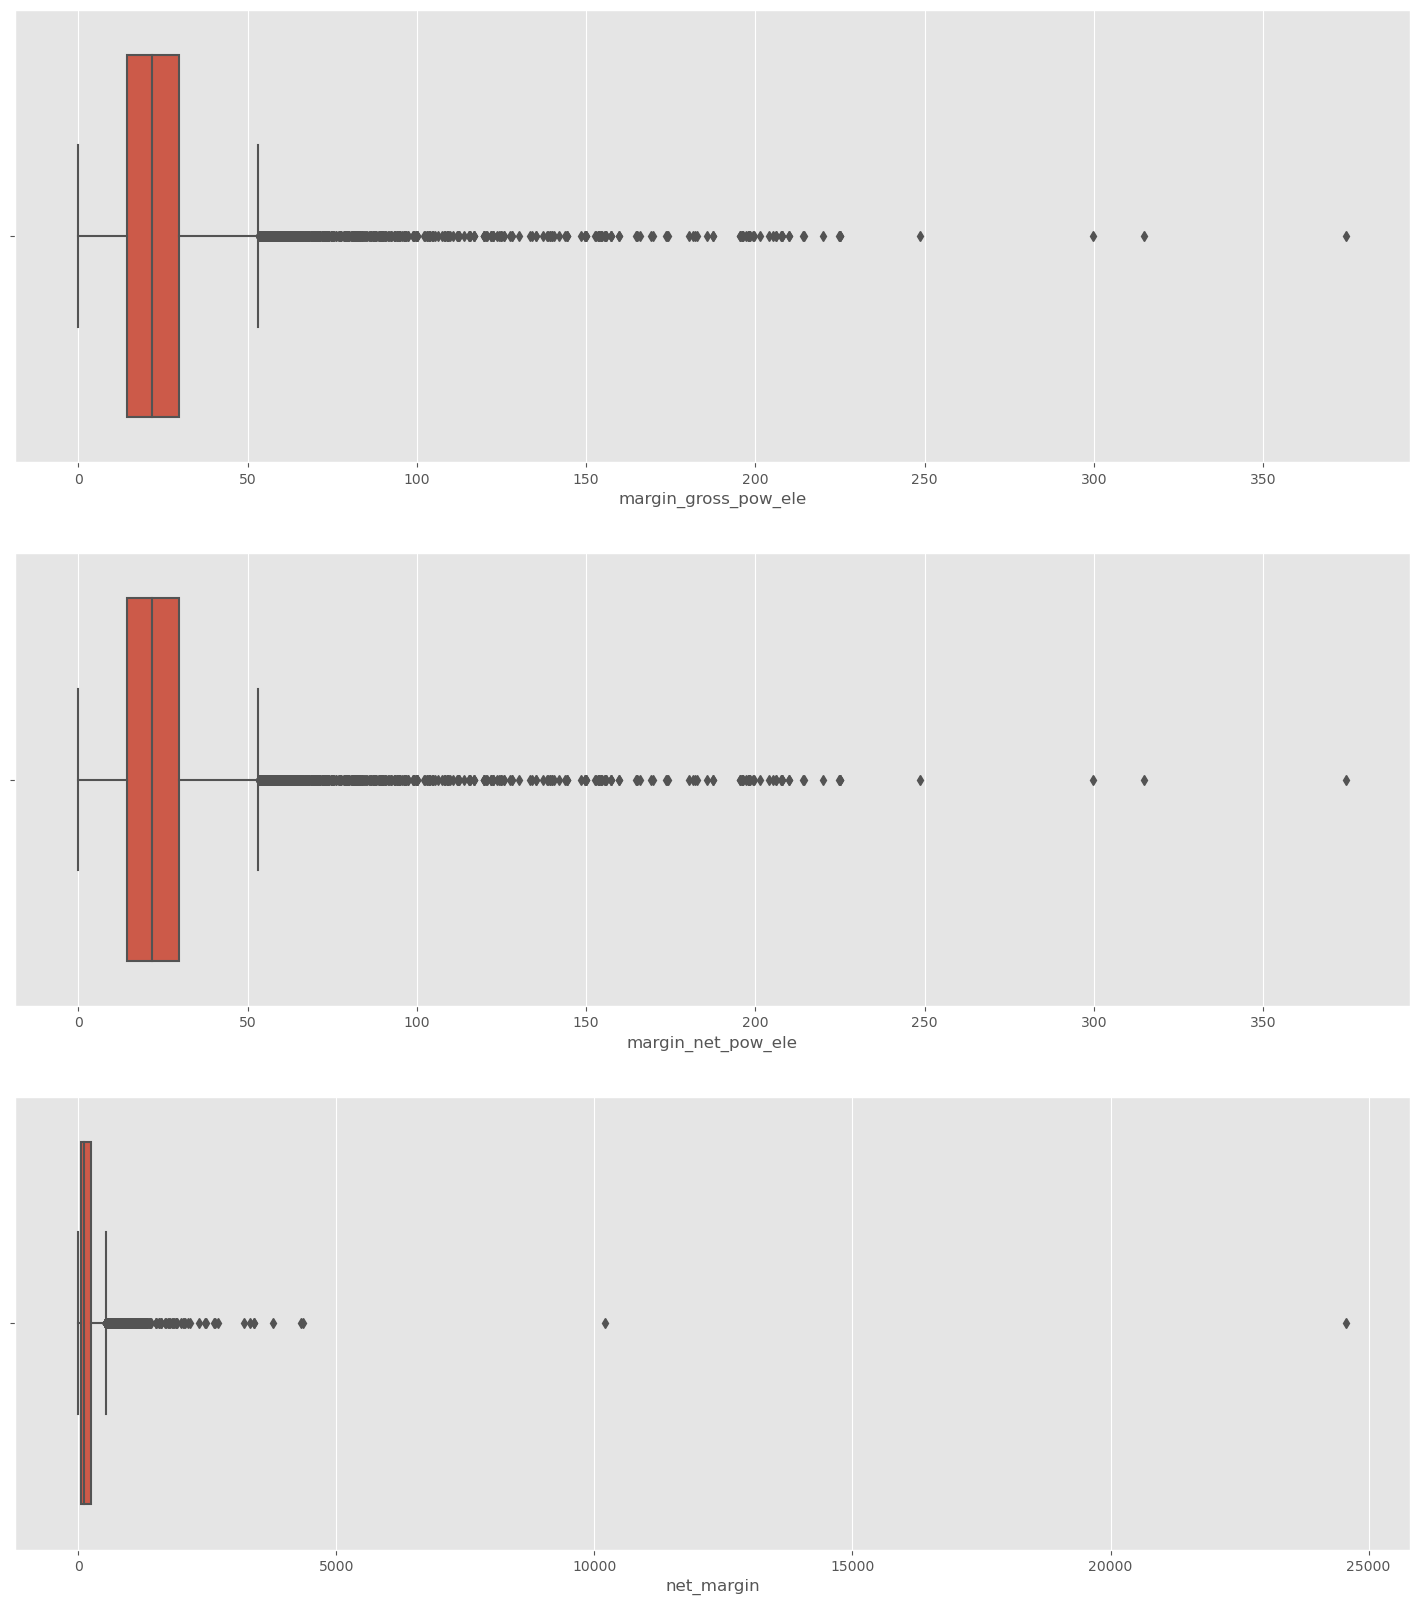

In [24]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')


plt.show()

**=> As we can clearly see that from above plot there are certain outliers available in this data.**

### 4.7 Subscribed Power

In [25]:
sub_power = client_data[['id','pow_max','churn']]

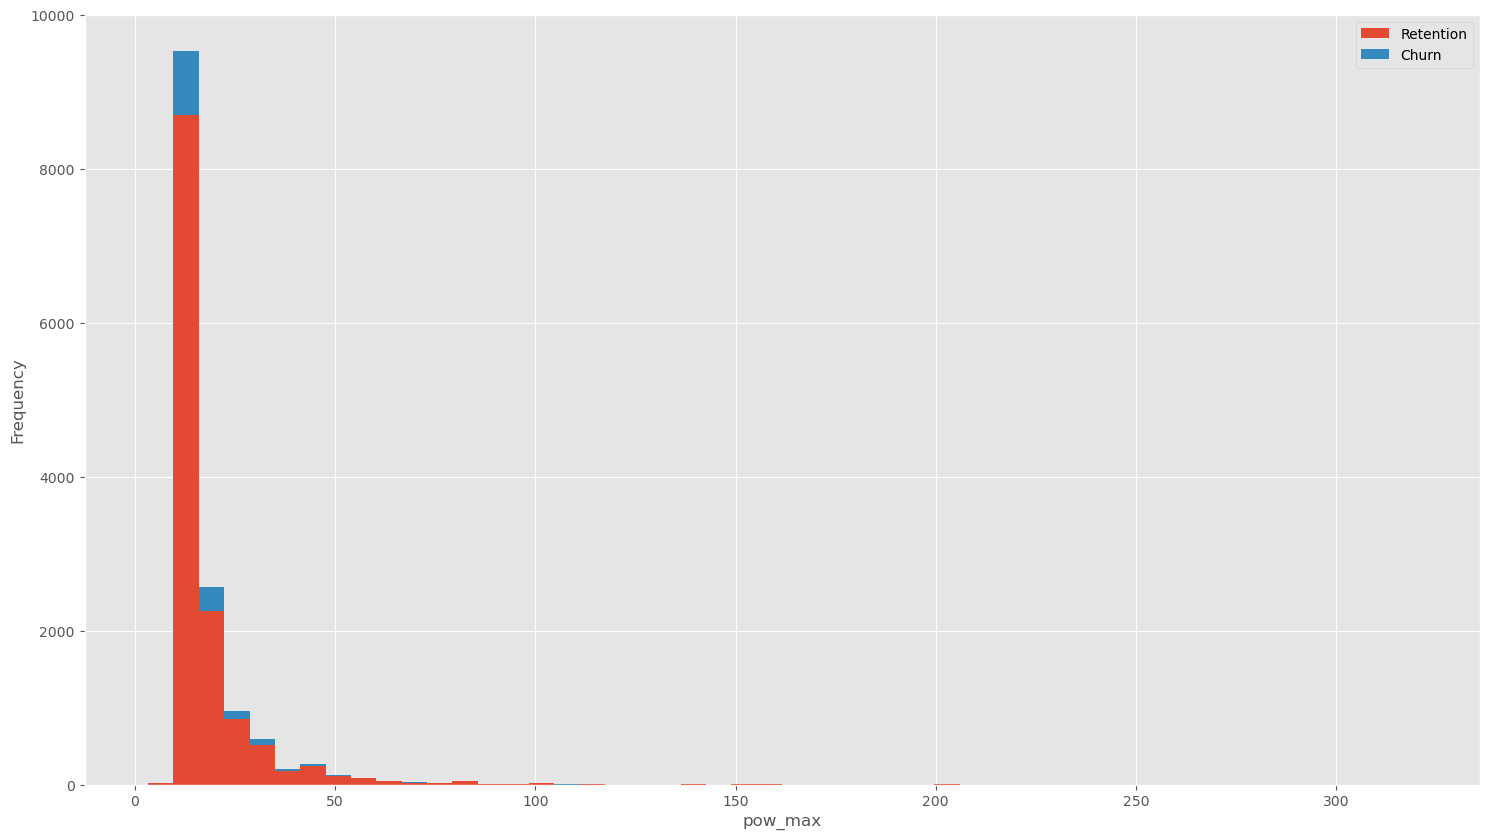

In [26]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10))

plot_distribution(sub_power, 'pow_max', axs)
plt.show()

### 4.8 Other Columns

In [27]:
other_col = client_data[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = other_col.groupby([other_col['nb_prod_act'], other_col['churn']])['id'].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending =False)

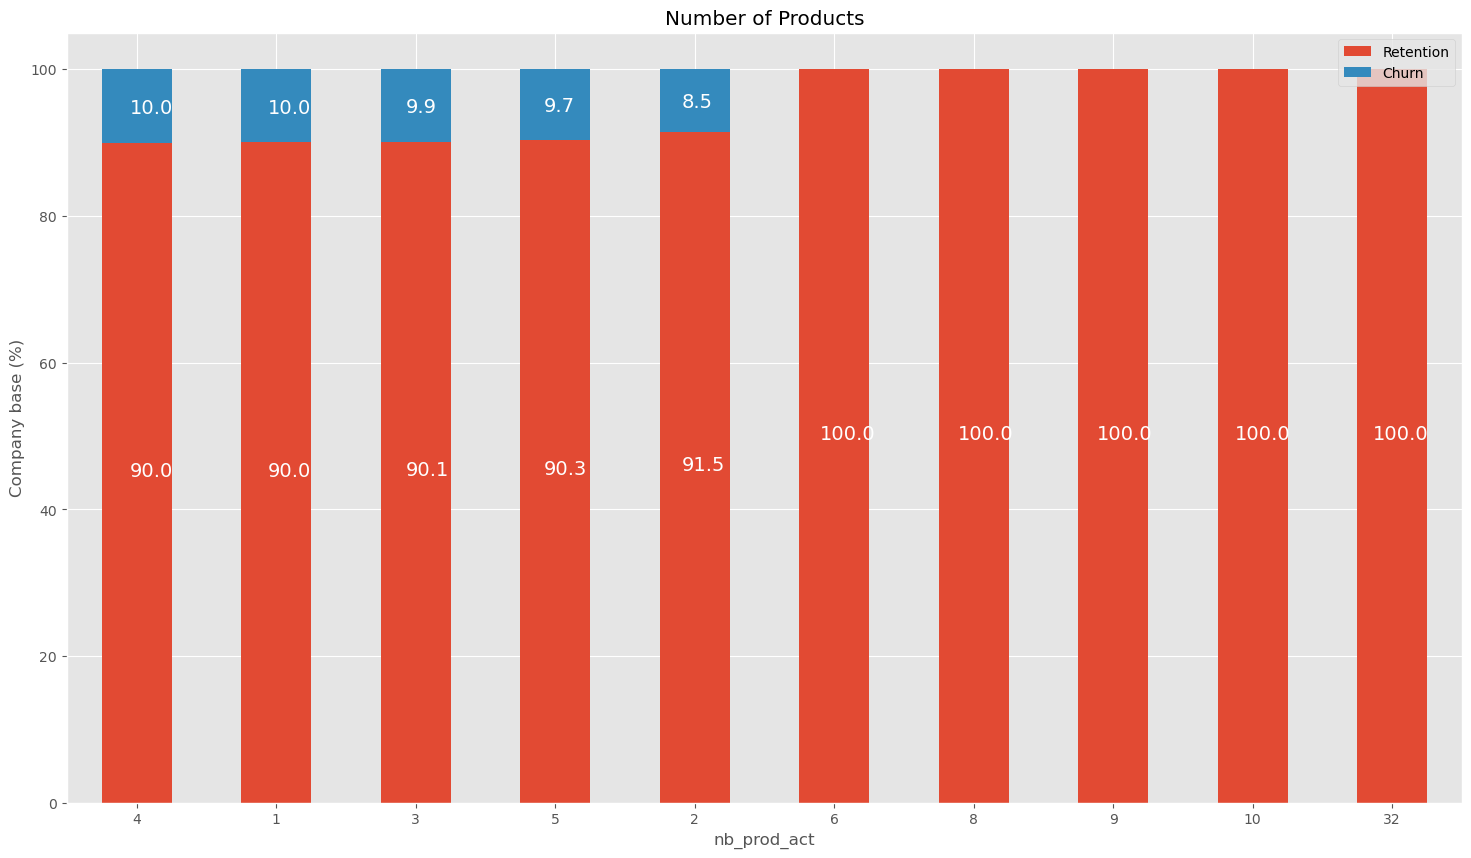

In [28]:
plot_stacked_bars(products_percentage, "Number of Products")

In [29]:
year_antig = other_col.groupby([other_col['num_years_antig'],other_col['churn']])['id'].count().unstack(level=1)
year_antig_percentage = year_antig.div(year_antig.sum(axis=1),axis=0)*100

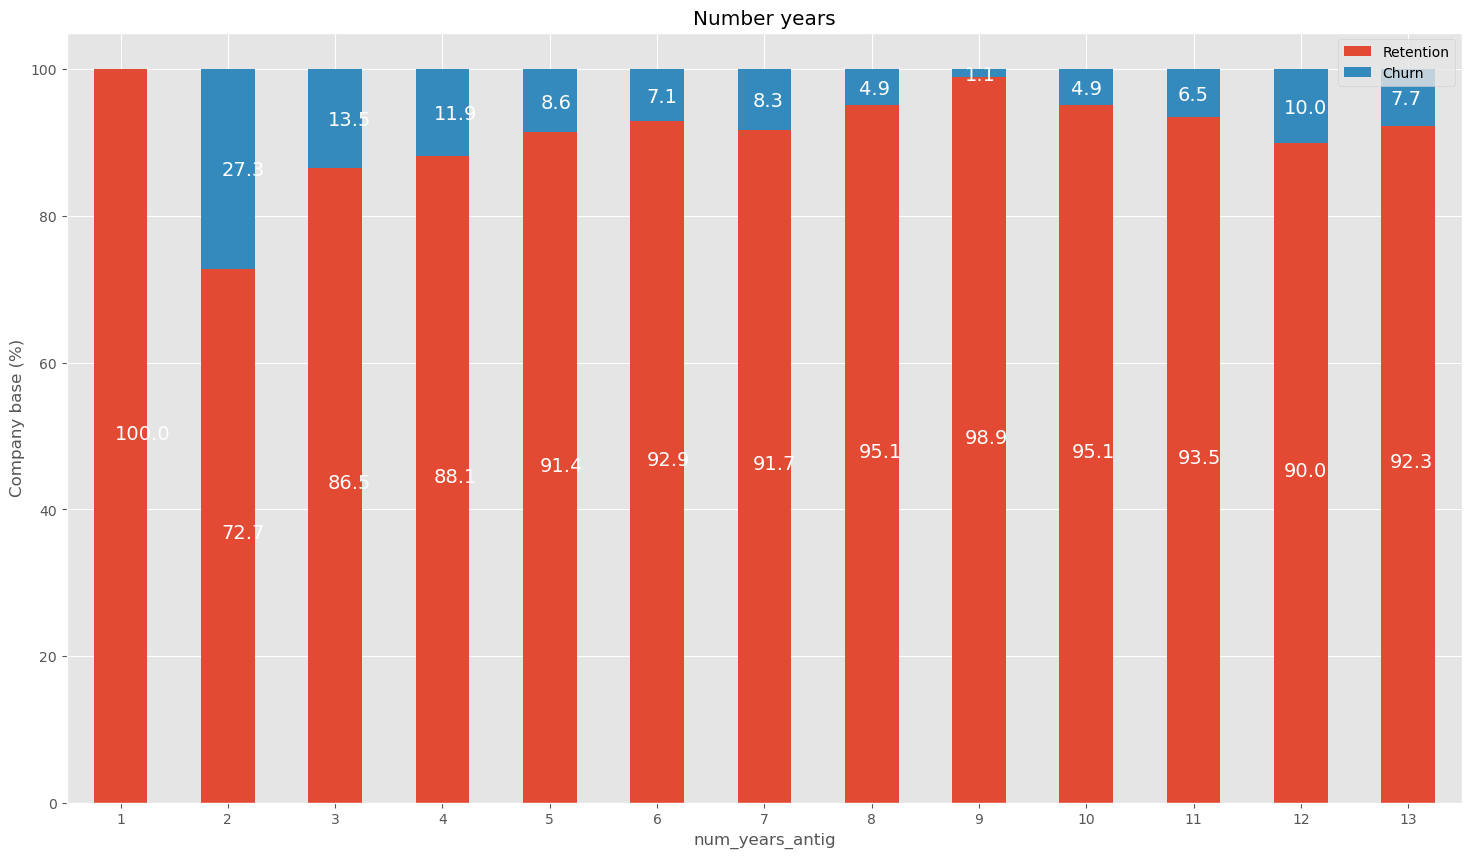

In [30]:
plot_stacked_bars(year_antig_percentage, "Number years")

In [31]:
origin = other_col.groupby([other_col['origin_up'],other_col['churn']])['id'].count().unstack()
origin_percentage = origin.div(origin.sum(axis=1), axis=0)*100

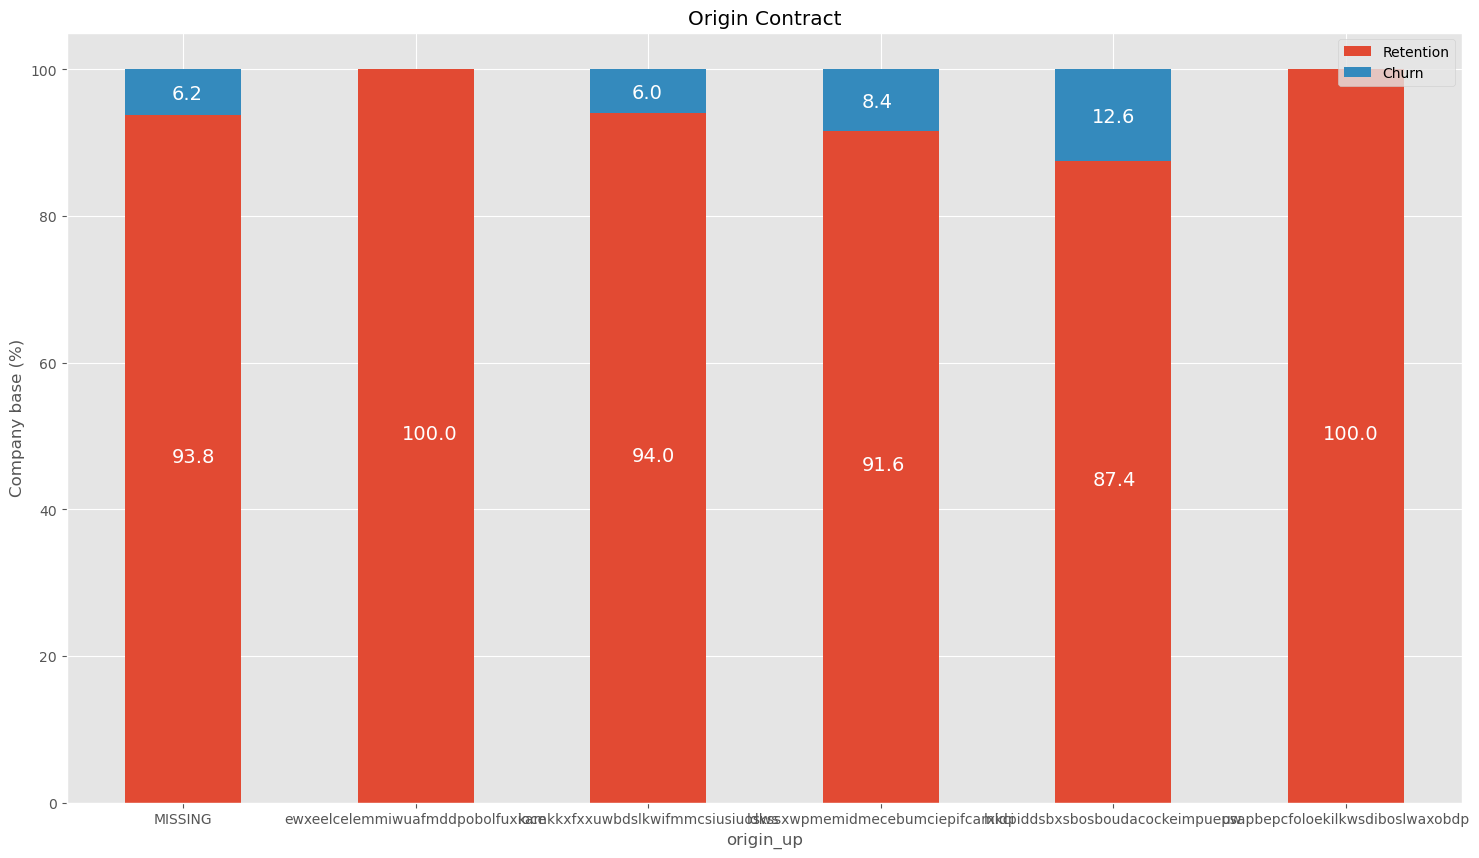

In [32]:
plot_stacked_bars(origin_percentage, 'Origin Contract')

In [33]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### 4.9 Transforming Date columns to datetime type 

In [34]:
# Transforming Date Columns in Client_data
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'], format = '%Y-%m-%d')
client_data['date_end'] = pd.to_datetime(client_data['date_end'], format ='%Y-%m-%d')
client_data['date_modif_prod'] = pd.to_datetime(client_data['date_modif_prod'], format = '%Y-%m-%d')
client_data['date_renewal'] = pd.to_datetime(client_data['date_renewal'], format = '%Y-%m-%d')

# Transformig Date column in price_date
price_data['price_date'] = pd.to_datetime(price_data['price_date'], format= '%Y-%m-%d')

## 5. Price_data Analysis

### Mean average  

In [35]:
year_mean = price_data.groupby(['id']).mean().reset_index()
mean_6m = price_data[price_data['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_data[price_data['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [36]:
year_mean = year_mean.rename(index=str, columns={"price_off_peak_var": "year_mean_price_off_peak_var", 
                                                 "price_peak_var": "year_mean_price_peak_var", 
                                                 "price_mid_peak_var": "year_mean_price_mid_peak_var", 
                                                 "price_off_peak_fix": "year_mean_price_off_peak_fix", 
                                                 "price_peak_fix": "year_mean_price_peak_fix", 
                                                 "price_mid_peak_fix": "year_mean_price_mid_peak_fix"})

year_mean["year_mean_price_off_peak"] = year_mean["year_mean_price_off_peak_var"] + year_mean["year_mean_price_off_peak_fix"]
year_mean["year_mean_price_peak"] = year_mean["year_mean_price_peak_var"] + year_mean["year_mean_price_peak_fix"]
year_mean["year_mean_price_mid_peak"] = year_mean["year_mean_price_mid_peak_var"] + year_mean["year_mean_price_mid_peak_fix"]

mean_6m = mean_6m.rename(index=str, columns={"price_off_peak_var": "mean_6m_price_off_peak_var", 
                                             "price_peak_var": "mean_6m_price_peak_var", 
                                             "price_mid_peak_var": "mean_6m_price_mid_peak_var", 
                                             "price_off_peak_fix": "mean_6m_price_off_peak_fix", 
                                             "price_peak_fix": "mean_6m_price_peak_fix", 
                                             "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"})

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

mean_3m = mean_3m.rename(index=str, columns={"price_off_peak_var": "mean_3m_price_off_peak_var", 
                                             "price_peak_var": "mean_3m_price_peak_var", 
                                             "price_mid_peak_var": "mean_3m_price_mid_peak_var", 
                                             "price_off_peak_fix": "mean_3m_price_off_peak_fix", 
                                             "price_peak_fix": "mean_3m_price_peak_fix", 
                                             "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"})

mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_mid_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

### Merging in new Dataframe

In [37]:
new_price_data = pd.merge(year_mean, mean_6m, on='id')
new_price_data = pd.merge(new_price_data, mean_3m, on='id')

In [38]:
new_price_data.head()

,id,year_mean_price_off_peak_var,year_mean_price_peak_var,year_mean_price_mid_peak_var,year_mean_price_off_peak_fix,year_mean_price_peak_fix,year_mean_price_mid_peak_fix,year_mean_price_off_peak,year_mean_price_peak,year_mean_price_mid_peak,...,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


    Now merge churn data with new_price_data and see that price sensitivity are correlated to churn

In [39]:
new_price_data = pd.merge(new_price_data, client_data[['id','churn']], on='id')
new_price_data.head()

,id,year_mean_price_off_peak_var,year_mean_price_peak_var,year_mean_price_mid_peak_var,year_mean_price_off_peak_fix,year_mean_price_peak_fix,year_mean_price_mid_peak_fix,year_mean_price_off_peak,year_mean_price_peak,year_mean_price_mid_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


### Correlation Matrix

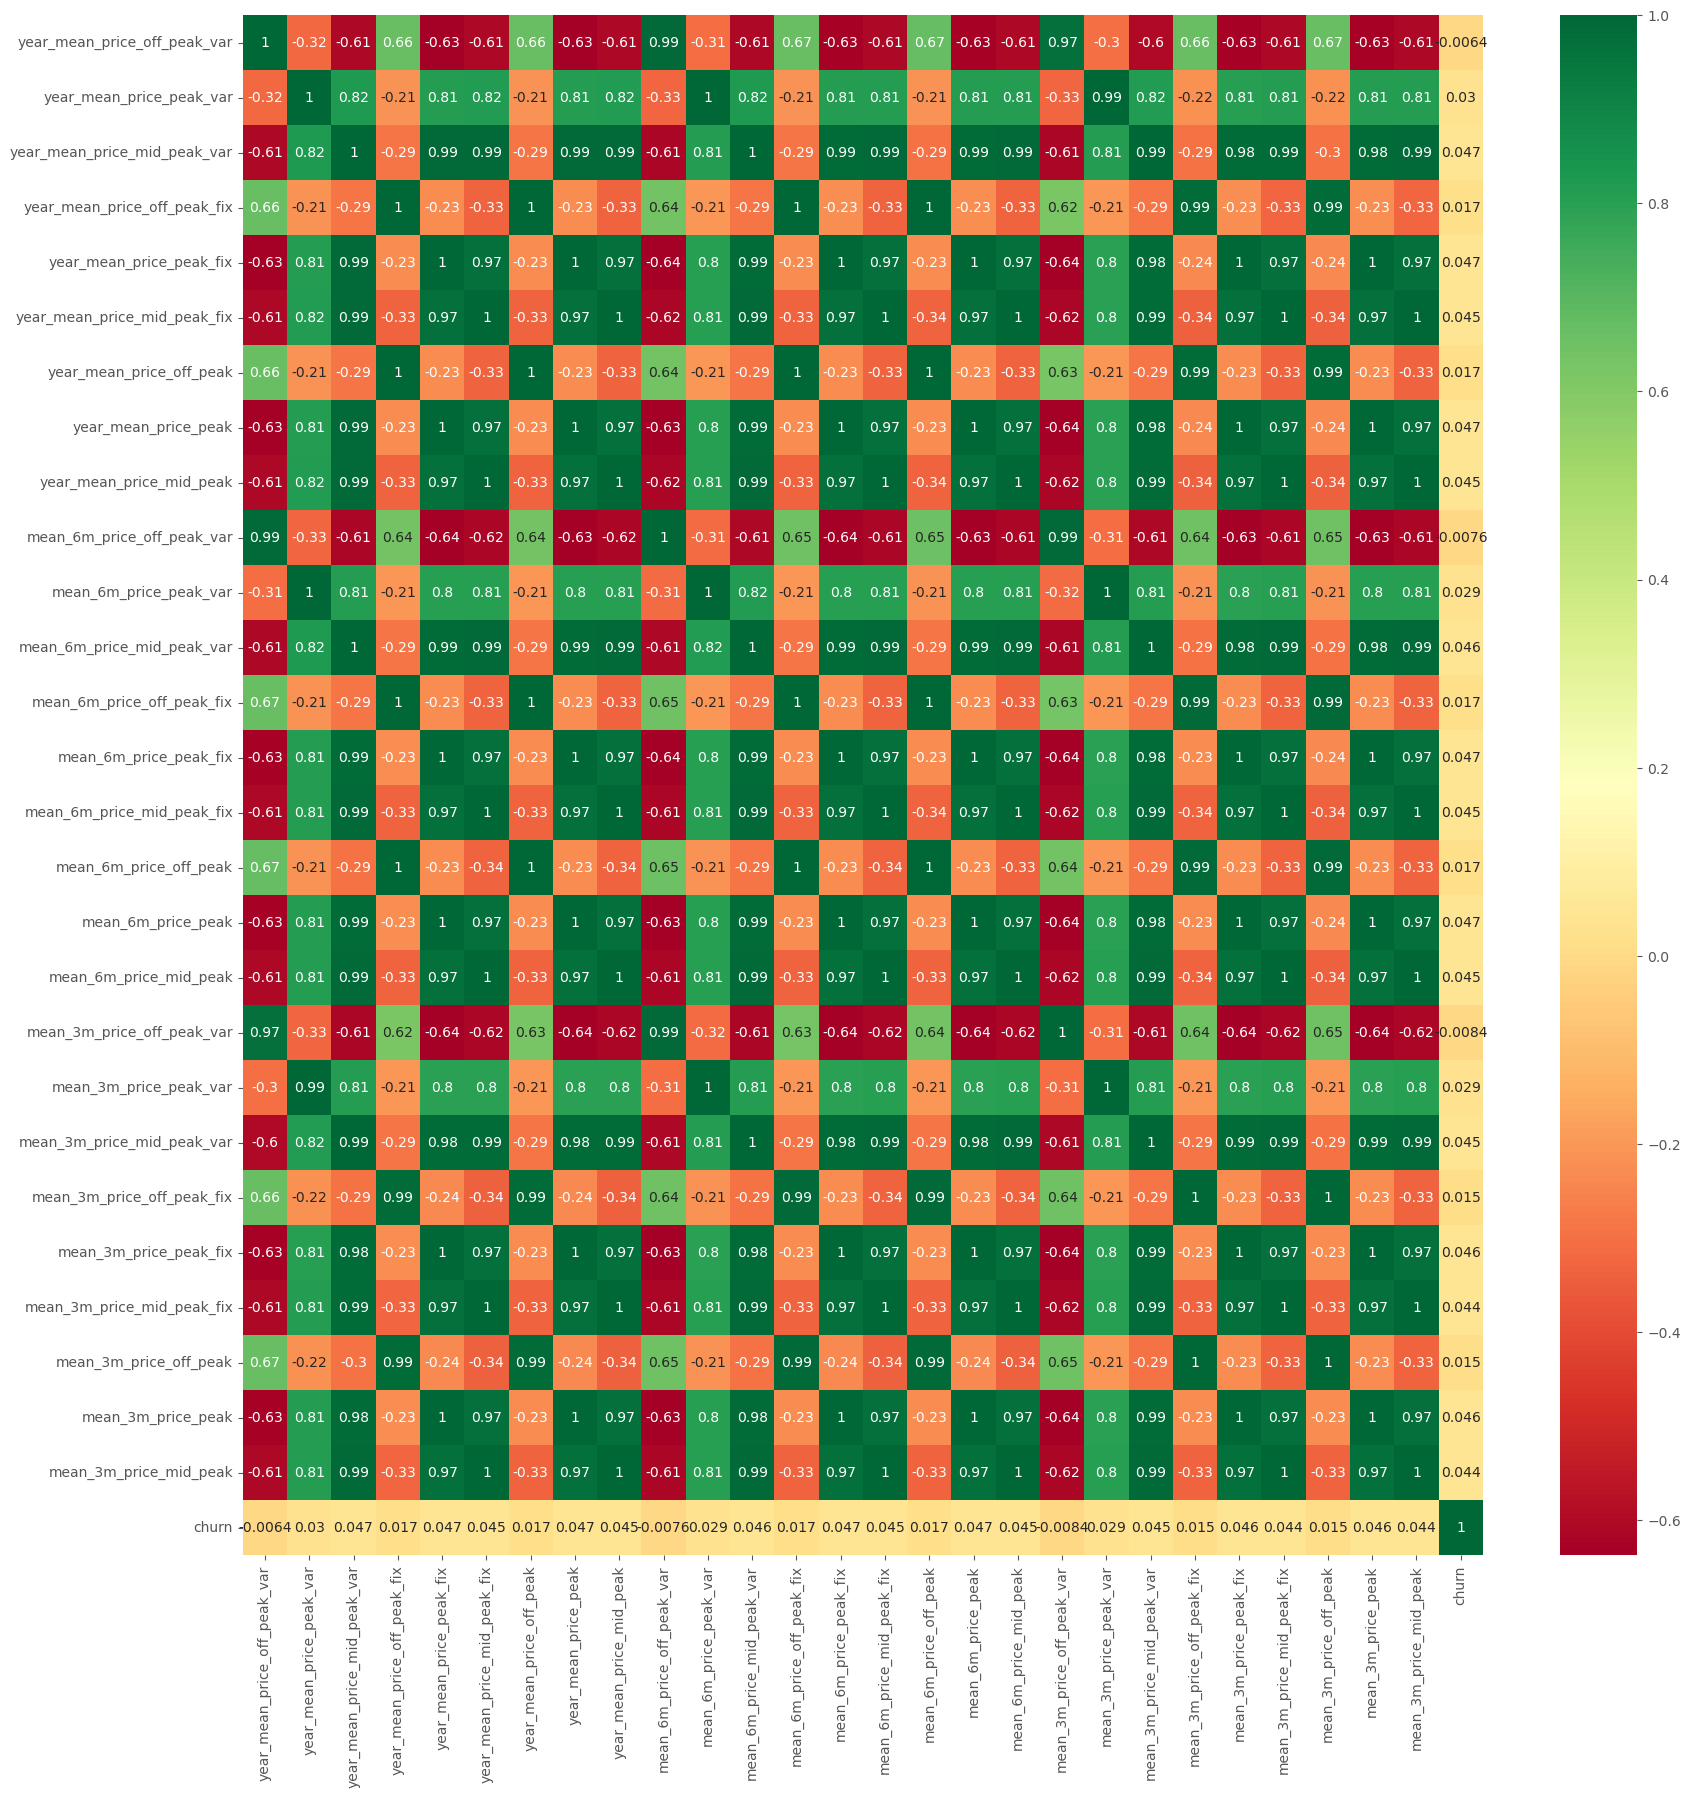

In [40]:
# Making correlation Matrix
corr = new_price_data.corr()

# Plotting correlation
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot= True, cmap= 'RdYlGn')
plt.show()

**=> As we can see that high degree of correlation with other price sensitive variable. This show that price sensitivity and churn have some linear relationship. We need to make some features if we want price sensitivity to be a significant factor.**

## Merging all the dataset

In [41]:
merged_data = pd.merge(client_data.drop(columns=['churn']) , new_price_data, on='id')
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


## Saving dataframe 

In [42]:
merged_data.to_csv('clean_eda_data.csv')